In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

print('✅ Librerie caricate')

sns.set_theme(style='whitegrid')

✅ Librerie caricate


# Migliorare il modello
1. Controllare che dati sono presenti
2. Considero solo le case con `price` inferiore a `10_000_000`
2. Creare dei dizionari per la trasformazione dei campi testuali
3. Applicare la map
4. Controllare i risultati

In [2]:
df = pd.read_csv('../data/Housing.csv')
print('✅ caricato il dataframe')

# considero le case solo inferiori a 10M
df = df[df['price'] <= 10_000_000]

display(df.head())
display(df['furnishingstatus'].unique())

trasformazione_binaria = {
    'yes': 1,
    'no': 0,
}
# hanno un ordinamento furnished > semi-furnished > unfurnished
trasformazione_fornitura = {
    'unfurnished': 0,
    'semi-furnished': 1,
    'furnished': 2,
}

colonne_yes_no = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

for col in colonne_yes_no:
    df[col] = df[col].map(trasformazione_binaria)
df['furnishingstatus'] = df['furnishingstatus'].map(trasformazione_fornitura)


display(df.head())

✅ caricato il dataframe


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished
10,9800000,13200,3,1,2,yes,no,yes,no,yes,2,yes,furnished
11,9681000,6000,4,3,2,yes,yes,yes,yes,no,2,no,semi-furnished
12,9310000,6550,4,2,2,yes,no,no,no,yes,1,yes,semi-furnished


array(['furnished', 'unfurnished', 'semi-furnished'], dtype=object)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,2
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,0
10,9800000,13200,3,1,2,1,0,1,0,1,2,1,2
11,9681000,6000,4,3,2,1,1,1,1,0,2,0,1
12,9310000,6550,4,2,2,1,0,0,0,1,1,1,1


# Matrice di correlazione

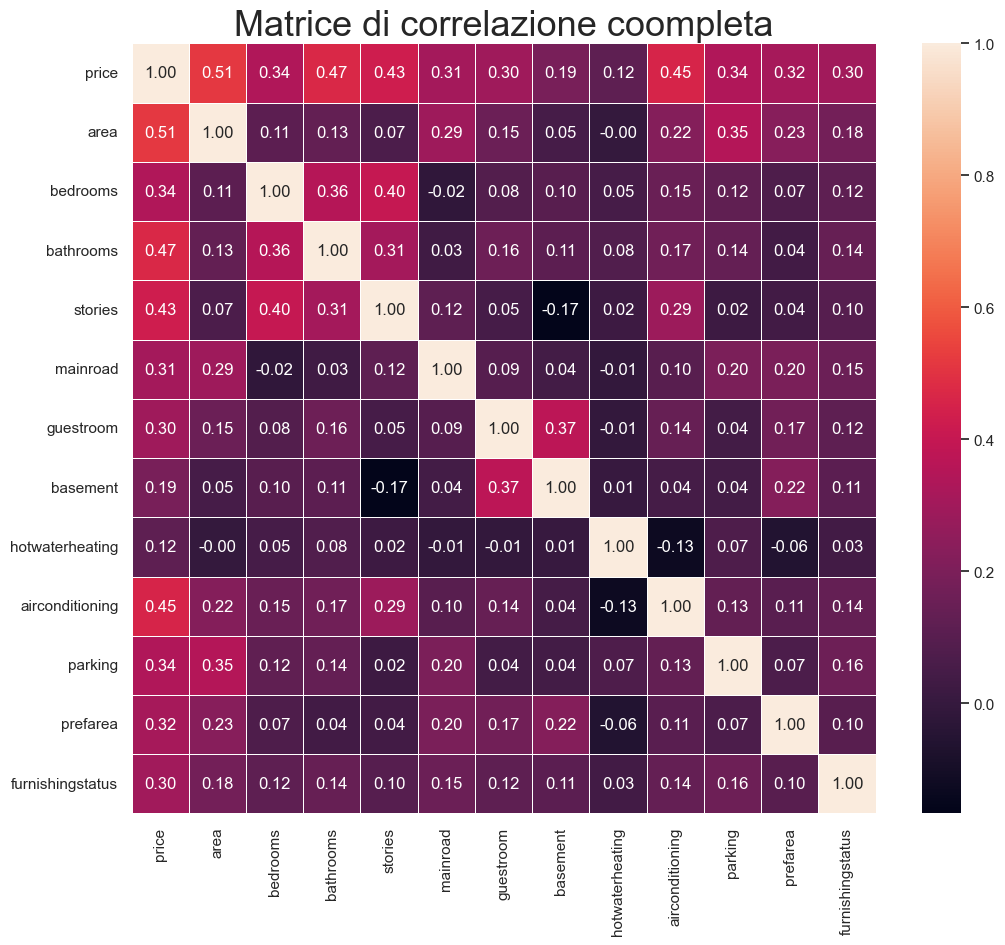

In [3]:
correlation_matrix = df.corr()

plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5, fmt=".2f")
plt.title('Matrice di correlazione coompleta', size=26)
plt.show()

# Allenamento
1. Split 80-20 del dataset in train-test
2. Alleno il modello
3. Calcolo R2
4. Conclusioni

In [4]:
# drop colonna price
X = df.drop(['price'], axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('✅ Split 80% 20%')

model = LinearRegression()
model.fit(X_train, y_train)
print('✅ Model fit')

y_pred = model.predict(X_test)
print('✅ Previsione')

r2 = r2_score(y_test, y_pred)

print(f"🔥 R2 = {r2:.2f}")

✅ Split 80% 20%
✅ Model fit
✅ Previsione
🔥 R2 = 0.70


# Grafico
1. grafico dei prezzi reali vs previsioni

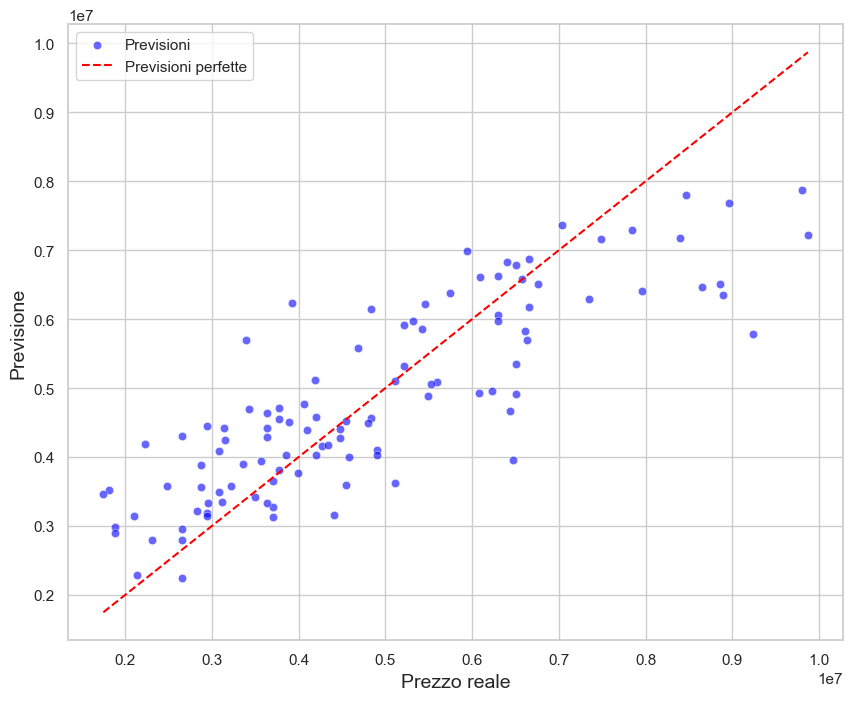

In [5]:
plt.figure(figsize=(10,8))
min_val = y.min()
max_val = y.max()
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='blue', label='Previsioni')
plt.plot([min_val, max_val],[min_val,max_val], color='red', linestyle='--', label='Previsioni perfette')
plt.legend()
plt.xlabel('Prezzo reale', size=14)
plt.ylabel('Previsione', size=14)
plt.show()